### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Esta primera parte el presente código se enfoca en determinar las ventas totales (facturación) de cada tienda y visualizar estos resultados mediante un gráfico de barras.

     Tienda  Total ingresos
0  Tienda 1    1.150880e+09
1  Tienda 2    1.116344e+09
2  Tienda 3    1.098020e+09
3  Tienda 4    1.038376e+09




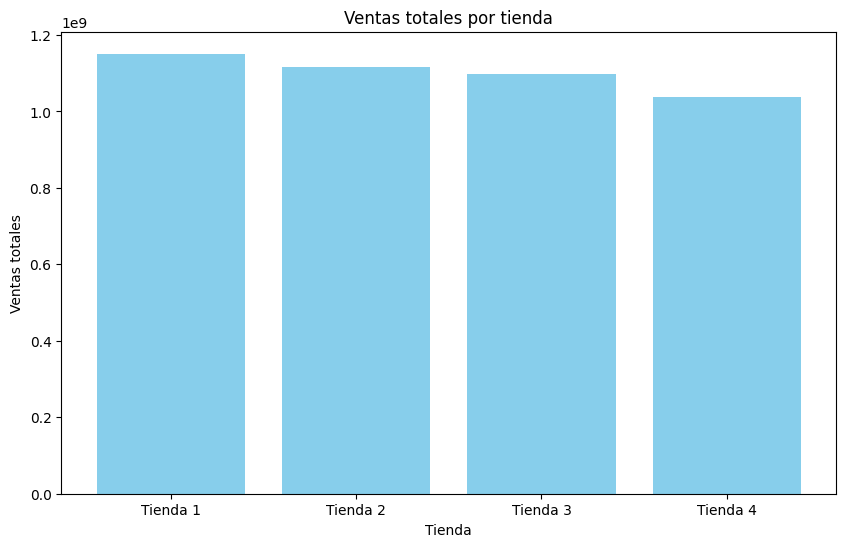

In [2]:

import matplotlib.pyplot as plt

resultados = []
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):
   suma_precio = tienda['Precio'].sum()
   resultados.append({'Tienda': nombre, 'Total ingresos': suma_precio})

df_resultados = pd.DataFrame(resultados)
print(df_resultados)
print('\n')

plt.figure(figsize=(10, 6))
plt.bar(df_resultados['Tienda'], df_resultados['Total ingresos'], color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por tienda')
plt.show()




# 2. Ventas por categoría

Ahora mediante Phyton y Panda se calculan las ventas totales de cada categoría de producto en cada tienda. Se muestra el resultado en listados por cada tienda.

In [ ]:
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):

    df = pd.read_csv(url)
    suma_por_producto = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index().sort_values(by='Precio', ascending = False)

    print(f'Ventas totales por productos en la {nombre}:')
    print(suma_por_producto)
    print('\n')



Ventas totales por productos en la tienda_1:
    Categoría del Producto       Precio
3             Electrónicos  409476100.0
2        Electrodomésticos  283260200.0
7                  Muebles  192528900.0
4   Instrumentos musicales   75102400.0
1     Deportes y diversión   33350100.0
5                 Juguetes   20262200.0
0  Artículos para el hogar   15074500.0
6                   Libros    9321300.0


Ventas totales por productos en la tienda_2:
    Categoría del Producto       Precio
3             Electrónicos  410831100.0
2        Electrodomésticos  348567800.0
7                  Muebles  176426300.0
4   Instrumentos musicales  104990300.0
1     Deportes y diversión   34744500.0
5                 Juguetes   15945400.0
0  Artículos para el hogar   14746900.0
6                   Libros   10091200.0


Ventas totales por productos en la tienda_3:
    Categoría del Producto       Precio
3             Electrónicos  410775800.0
2        Electrodomésticos  329237900.0
7                  Mu

# 3. Calificación promedio de la tienda


Aquí se calcula la calificación promedio de cada tienda y se muestra en un gráfico de barras y en forma de lista.

     Tienda  Calificacion Promedio
2  tienda_3               4.048326
1  tienda_2               4.037304
0  tienda_1               3.995759
3  tienda_4               3.995759


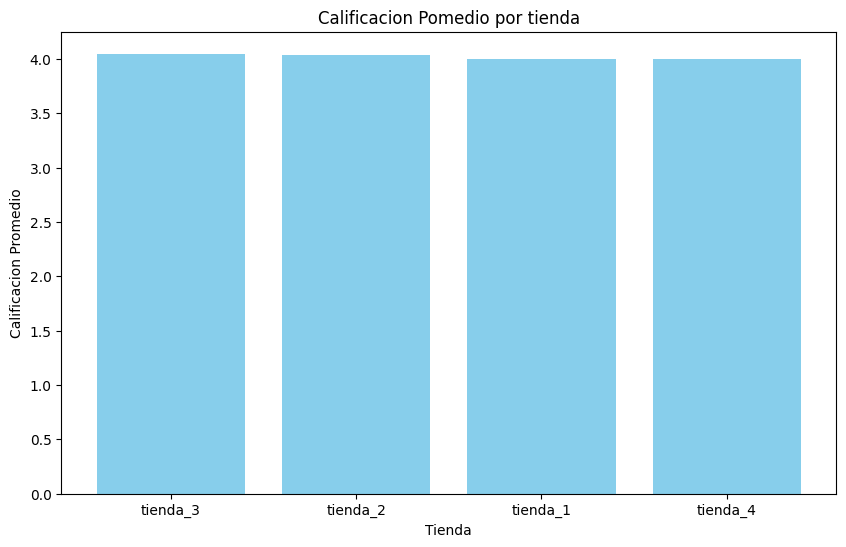

In [ ]:
all_calificaciones_promedio = []

for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  df = pd.read_csv(url)
  calificacion_promedio_tienda = tienda_df['Calificación'].mean()
  all_calificaciones_promedio.append({'Tienda': nombre, 'Calificacion Promedio': calificacion_promedio_tienda})

df_calificaciones_promedio = pd.DataFrame(all_calificaciones_promedio).sort_values(by='Calificacion Promedio', ascending = False)
print(df_calificaciones_promedio)

plt.figure(figsize=(10, 6))
plt.bar(df_calificaciones_promedio['Tienda'], df_calificaciones_promedio['Calificacion Promedio'], color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Calificacion Promedio')
plt.title('Calificacion Pomedio por tienda')
plt.show()


# 4. Productos más y menos vendidos

Esto es un  bucle for, que itera los datos de cada una de las cuatro tiendas, entregando los resultados en listados y gráficos por cada tienda.

Productos más vendidos en tienda_1:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


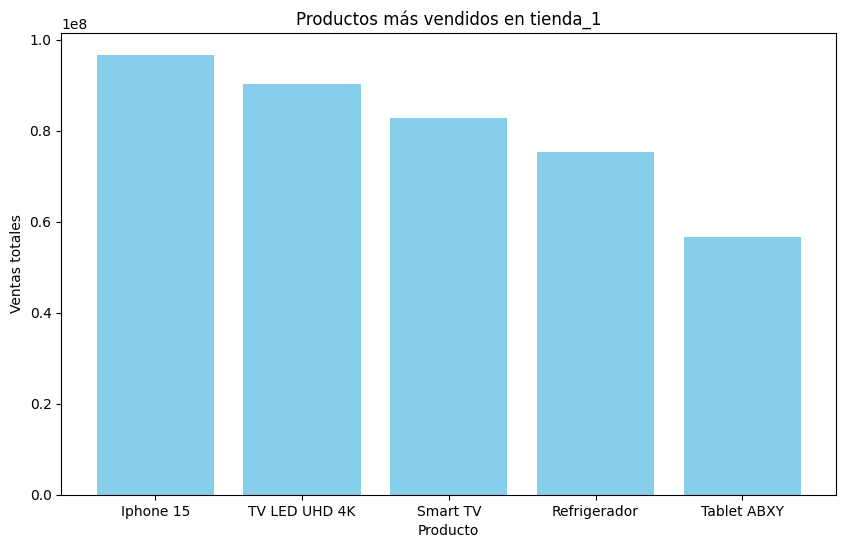



Productos más vendidos en tienda_2:
           Producto       Precio
0         Iphone 15  113225800.0
1     TV LED UHD 4K  103375000.0
2      Refrigerador   97632500.0
3  Lavadora de ropa   66762300.0
4          Smart TV   61142000.0


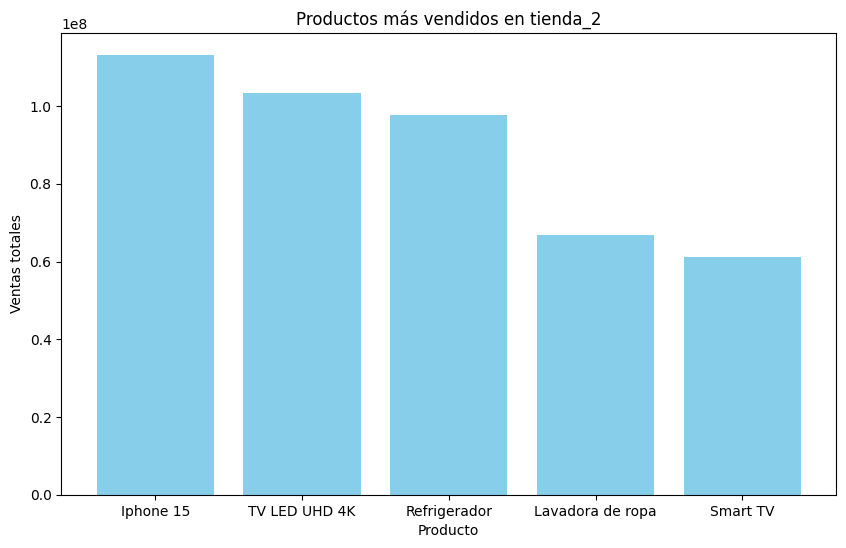



Productos más vendidos en tienda_3:
        Producto      Precio
0   Refrigerador  99889700.0
1  TV LED UHD 4K  96669100.0
2      Iphone 15  93225700.0
3       Smart TV  78837300.0
4   Lavavajillas  64364800.0


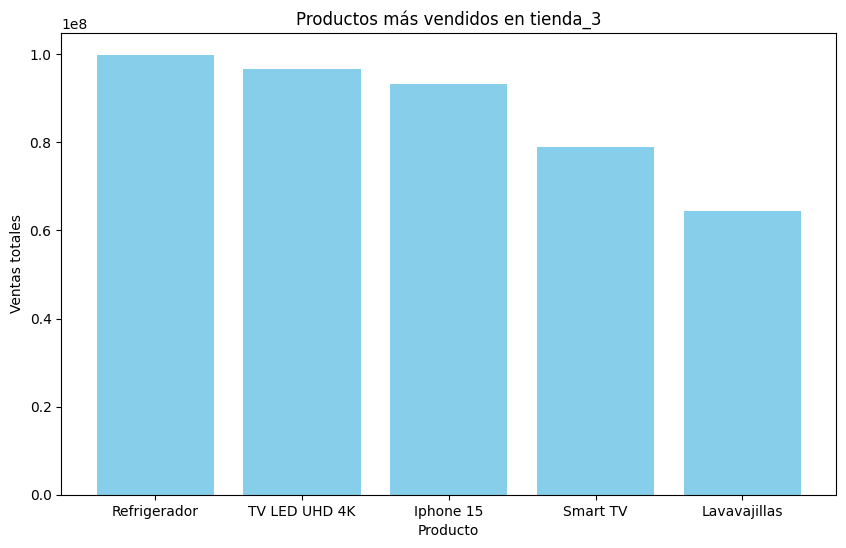



Productos más vendidos en tienda_4:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


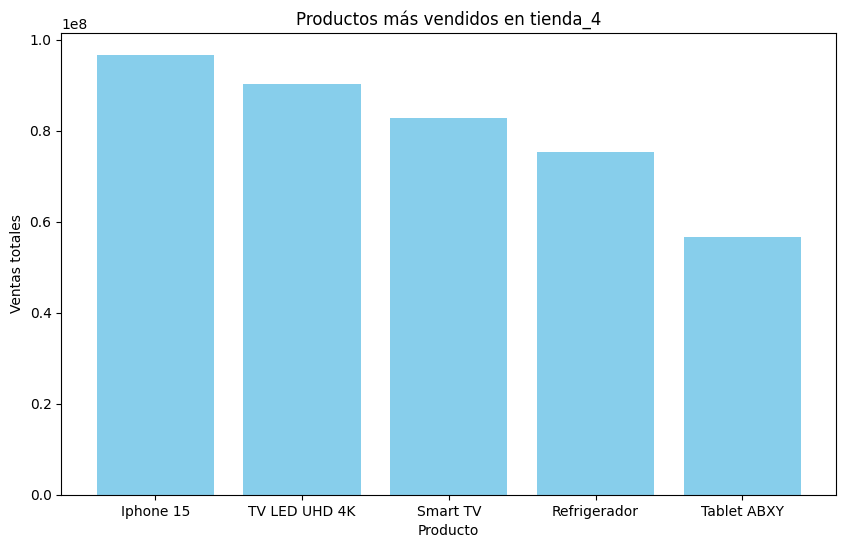

In [ ]:
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):

  productos_mas_vendidos = tienda_df.groupby('Producto')['Precio'].sum().nlargest(5).reset_index()
  print(f'Productos más vendidos en {nombre}:')
  print(productos_mas_vendidos)



  plt.figure(figsize=(10, 6))
  plt.bar(productos_mas_vendidos['Producto'], productos_mas_vendidos['Precio'], color='skyblue')
  plt.xlabel('Producto')
  plt.ylabel('Ventas totales')
  plt.title(f"Productos más vendidos en {nombre}")
  plt.show()
  print('\n')



Es igual al código anterior salvo alguna diferencias para determinar lo productos menos vendidos.

Productos menos vendidos en tienda_1:
             Producto     Precio
0  Cuerda para saltar   704800.0
1     Cubo mágico 8x8   748400.0
2      Dinosaurio Rex   858100.0
3   Ajedrez de madera  1075500.0
4        Set de vasos  1471800.0


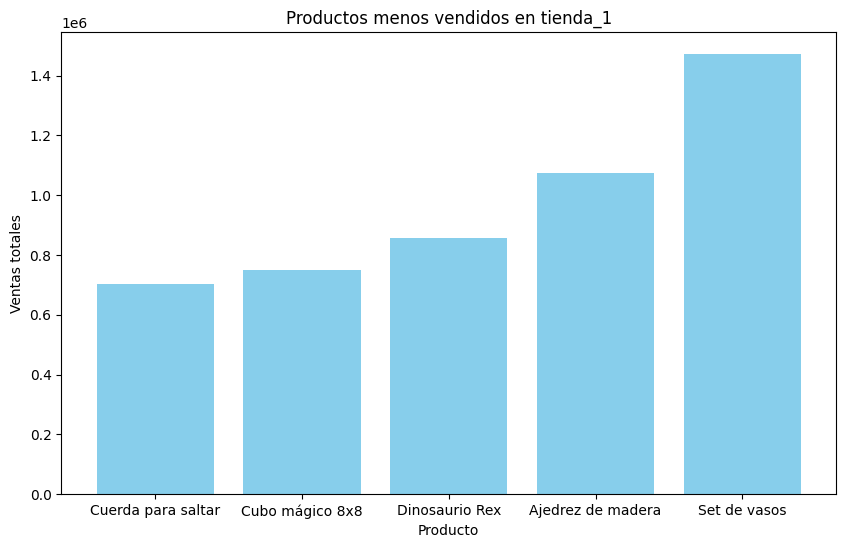



Productos menos vendidos en tienda_2:
             Producto     Precio
0     Cubo mágico 8x8   643600.0
1      Dinosaurio Rex   770300.0
2  Cuerda para saltar   856900.0
3   Ajedrez de madera  1287700.0
4        Set de vasos  1542600.0


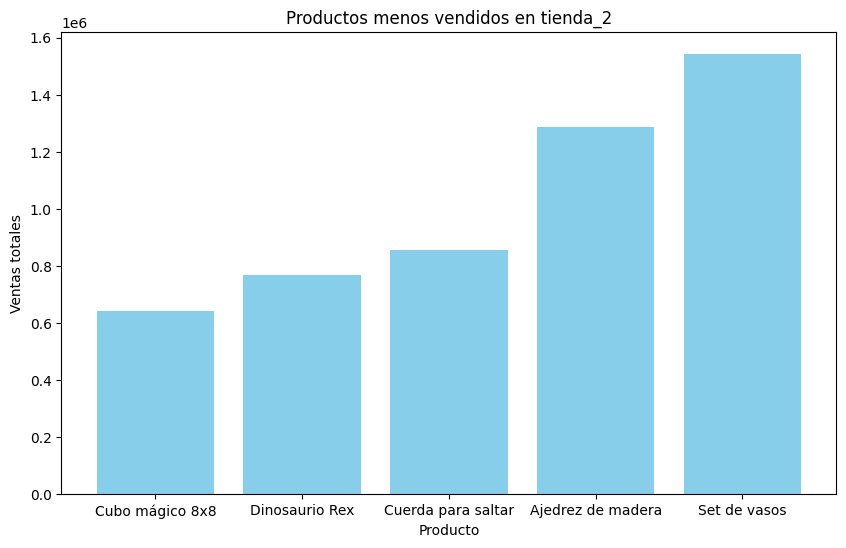



Productos menos vendidos en tienda_3:
                  Producto     Precio
0          Cubo mágico 8x8   640400.0
1           Dinosaurio Rex   795600.0
2       Cuerda para saltar   853800.0
3             Set de vasos  1210700.0
4  Bloques de construcción  1237200.0


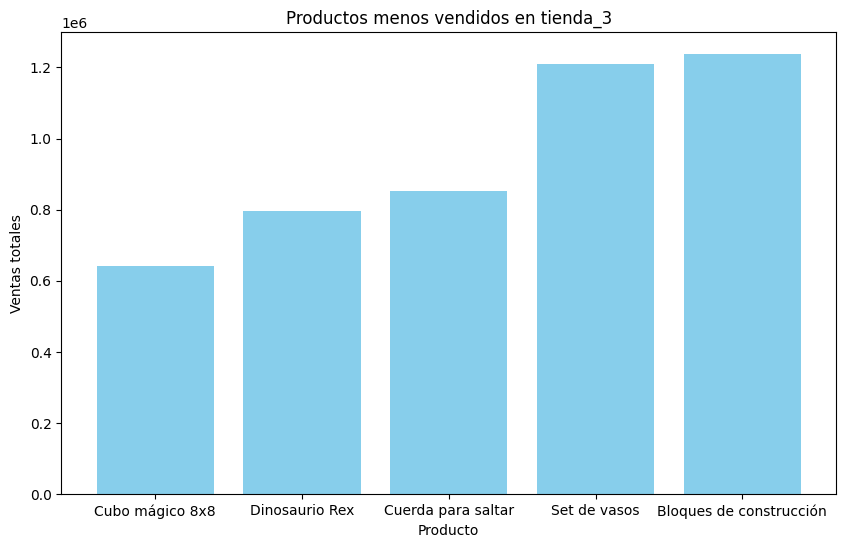



Productos menos vendidos en tienda_4:
             Producto     Precio
0  Cuerda para saltar   704800.0
1     Cubo mágico 8x8   748400.0
2      Dinosaurio Rex   858100.0
3   Ajedrez de madera  1075500.0
4        Set de vasos  1471800.0


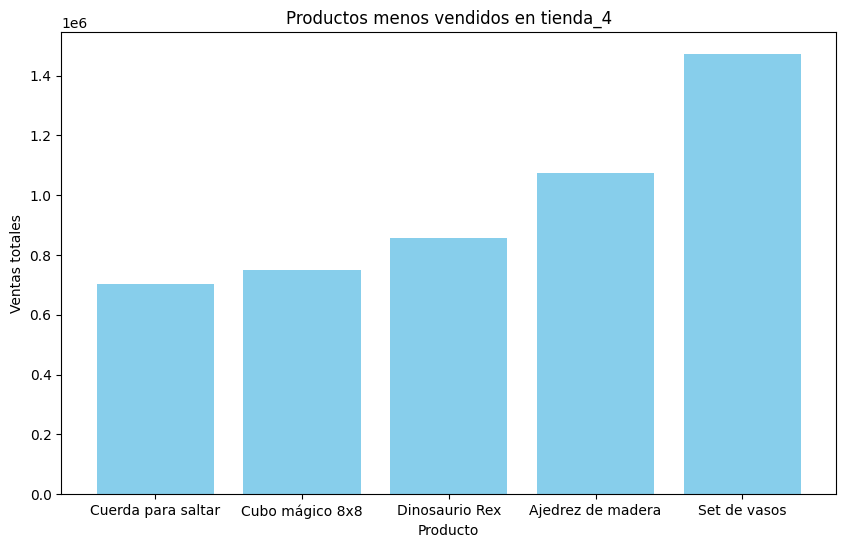

In [ ]:
for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  productos_menos_vendidos = tienda_df.groupby('Producto')['Precio'].sum().nsmallest(5).reset_index()
  print(f'Productos menos vendidos en {nombre}:')
  print(productos_menos_vendidos)



  plt.figure(figsize=(10, 6))
  plt.bar(productos_menos_vendidos['Producto'], productos_menos_vendidos['Precio'], color='skyblue')
  plt.xlabel('Producto')
  plt.ylabel('Ventas totales')
  plt.title(f"Productos menos vendidos en {nombre}")
  plt.show()
  print('\n')



# 5. Envío promedio por tienda

En esta parte se crea una lista y mediante un bucle se calculan los promedios del costo de envío de cada tienda, para entregar resultados en listados y gráficos de barras, que son la alternativa más representativa en este y todos los casos anteriores.

     Tienda  Costo de envío
1  tienda_2    25216.235693
2  tienda_3    24805.680373
0  tienda_1    23459.457167
3  tienda_4    23459.457167


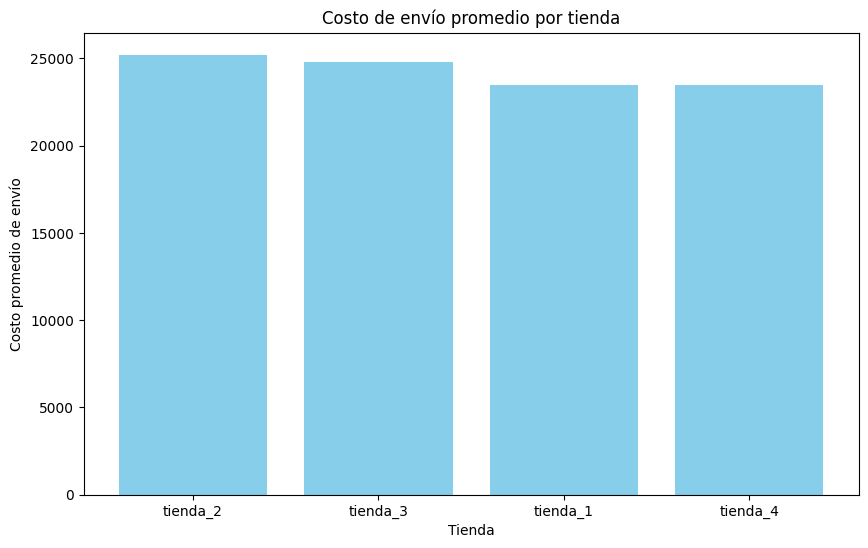

In [ ]:
all_envios_promedio = []

for tienda_df, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  envio_promedio = tienda_df['Costo de envío'].mean()
  all_envios_promedio.append({'Tienda': nombre, 'Costo de envío': envio_promedio })

df_envios_promedio = pd.DataFrame(all_envios_promedio).sort_values(by='Costo de envío', ascending = False)
print(df_envios_promedio)

plt.figure(figsize=(10, 6))
plt.bar(df_envios_promedio['Tienda'], df_envios_promedio['Costo de envío'], color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Costo promedio de envío')
plt.title('Costo de envío promedio por tienda')
plt.show()



